## NAME:MOHAMMAD RAFAY KHAN
## COURSE:DATA SCIENCE FINAL PROJECT KAMIYAB JAWAN

### ATTRIBUTE INFORMATION

#### 1)age 
#### 2)sex
#### 3)chest pain type (4 values)
#### 4)resting blood pressure
#### 5)serum cholestoral in mg/dl
#### 6)fasting blood sugar > 120 mg/dl
#### 7)resting electrocardiographic results (values 0,1,2)
#### 8)maximum heart rate achieved
#### 9)exercise induced angina
#### 10)oldpeak = ST depression induced by exercise relative to rest
#### 11)the slope of the peak exercise ST segment
#### 12)number of major vessels (0-3) colored by flourosopy
#### 13)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### STEP 1) IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 2) READING DATA

In [2]:
data=pd.read_csv(r"C:\Users\111\Desktop\python\kamiyab jawan final assignment\heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


#### As the dataset has the output variable in terms of 1 and 0 hence it is a supervised classification problem

### STEP 3) DATA CLEANING AND ANALYZING

### 3.1) CHECKING SHAPE OF DATA

In [3]:
data.shape

(1025, 14)

### 3.2) MISSING VALUES CHECK

In [4]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No missing values found

### 3.3) DATA TYPE CHECK

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Data types are okay and good to go with

### 3.4) DUPLICATE VALUES CHECK

In [7]:
data_1=data.duplicated()
print(data_1.sum())
data[data_1]

723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### There is a high possibility of duplicate values so no further analysis would be necessary

### 3.5) UNIQUE VALUES CHECK

In [8]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
data["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
data["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

#### According to the documentation provided Thal has 3 values(0,1,2) and ca has 4 values(0,1,2,3) however the datasets shows Thal has an extra value of (3) and ca has an extra value of (4).We will be dropping the columns corresponding to these rows.

In [11]:
data.drop(data[(data['thal'] ==3) | (data['ca'] ==4)].index, inplace=True)                   

In [12]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1


In [13]:
data.shape

(604, 14)

#### We have now cleaned the data from irrelevant records

### 3.6) CHARACTERISTICS OF DATA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 4 to 1023
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       604 non-null    int64  
 1   sex       604 non-null    int64  
 2   cp        604 non-null    int64  
 3   trestbps  604 non-null    int64  
 4   chol      604 non-null    int64  
 5   fbs       604 non-null    int64  
 6   restecg   604 non-null    int64  
 7   thalach   604 non-null    int64  
 8   exang     604 non-null    int64  
 9   oldpeak   604 non-null    float64
 10  slope     604 non-null    int64  
 11  ca        604 non-null    int64  
 12  thal      604 non-null    int64  
 13  target    604 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 70.8 KB


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,53.839404,0.571192,1.129139,129.938742,244.274834,0.144040,0.533113,152.718543,0.226821,0.800497,1.481788,0.528146,1.870861,0.703642
std,9.590749,0.495316,1.005728,16.226155,48.284027,0.351421,0.534603,23.063261,0.419123,0.998797,0.613285,0.854722,0.368600,0.457029
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,157.500000,0.000000,0.400000,2.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,170.000000,0.000000,1.400000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,417.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,2.000000,1.000000


### STEP 4) EDA

### COORELATION MATRIX

In [16]:
corr=data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.120646,-0.076590,0.273425,0.243978,0.195327,-0.122031,-0.471085,0.139859,0.189421,-0.154300,0.385234,-0.059824,-0.289337
sex,-0.120646,1.000000,-0.005170,-0.062287,-0.172580,0.069610,-0.099728,-0.025390,0.109814,0.102001,-0.039399,0.097106,-0.212977,-0.276598
cp,-0.076590,-0.005170,1.000000,0.067149,-0.108990,0.186584,0.029046,0.228784,-0.333199,-0.115298,0.135565,-0.123846,0.143478,0.314308
trestbps,0.273425,-0.062287,0.067149,1.000000,0.171975,0.161216,-0.031406,-0.067847,0.059108,0.154966,-0.021860,0.075756,-0.113899,-0.090561
chol,0.243978,-0.172580,-0.108990,0.171975,1.000000,0.031089,-0.101091,0.012537,0.025596,0.022318,0.089999,0.155043,0.137295,-0.087010
fbs,0.195327,0.069610,0.186584,0.161216,0.031089,1.000000,-0.153424,-0.081746,0.025520,0.033341,-0.045519,0.160397,-0.189030,-0.084843
restecg,-0.122031,-0.099728,0.029046,-0.031406,-0.101091,-0.153424,1.000000,0.055500,-0.111289,0.051681,0.039778,-0.141772,0.004905,0.118286
thalach,-0.471085,-0.025390,0.228784,-0.067847,0.012537,-0.081746,0.055500,1.000000,-0.335822,-0.332943,0.379398,-0.299764,0.248733,0.420804
exang,0.139859,0.109814,-0.333199,0.059108,0.025596,0.025520,-0.111289,-0.335822,1.000000,0.210880,-0.277458,0.146490,-0.207263,-0.384389
oldpeak,0.189421,0.102001,-0.115298,0.154966,0.022318,0.033341,0.051681,-0.332943,0.210880,1.000000,-0.565955,0.249703,-0.203881,-0.365517


<AxesSubplot:>

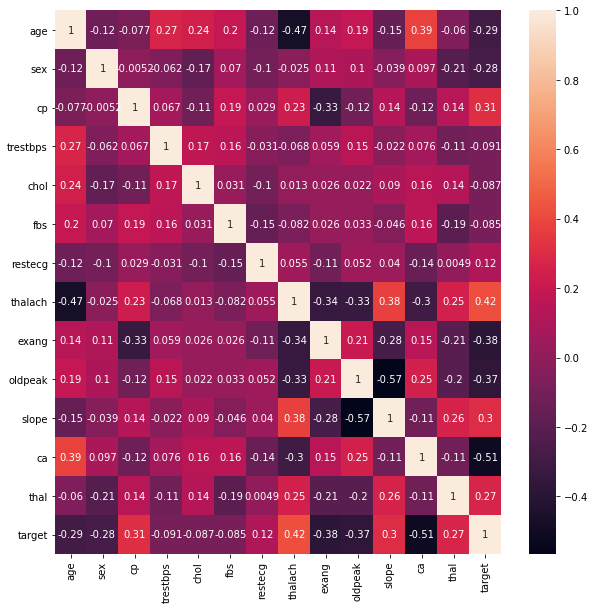

In [17]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr,annot=True)

### FEATURE SELECTION

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

X = data.drop(["target"], axis = 1)
y = data["target"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
selected_variables


['thalach',
 'ca',
 'oldpeak',
 'age',
 'exang',
 'cp',
 'chol',
 'sex',
 'slope',
 'trestbps']

#### Through coorelation and feature selection we have found that ['thalach','ca','oldpeak','age','exang','cp','chol','sex','slope','trestbps'] are important features

### PLOTTING GRAPHS

<AxesSubplot:xlabel='target', ylabel='thalach'>

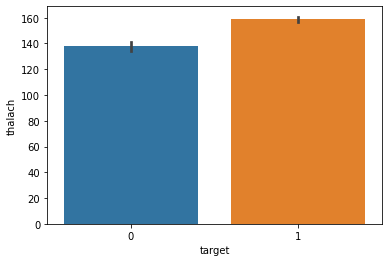

In [19]:
sns.barplot(x = 'target',y = 'thalach',data = data)
 

<AxesSubplot:xlabel='target', ylabel='ca'>

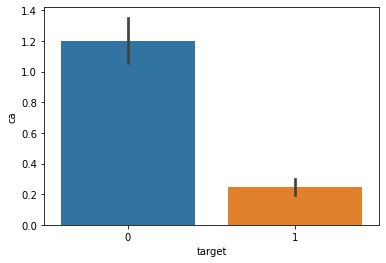

In [28]:
sns.barplot(x = 'target',y = 'ca',data = data)

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

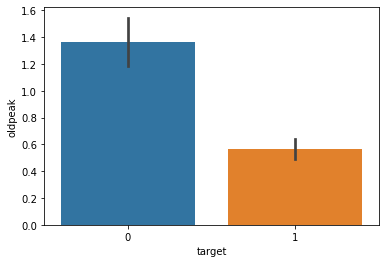

In [29]:
sns.barplot(x = 'target',y = 'oldpeak',data = data)

<AxesSubplot:xlabel='target', ylabel='age'>

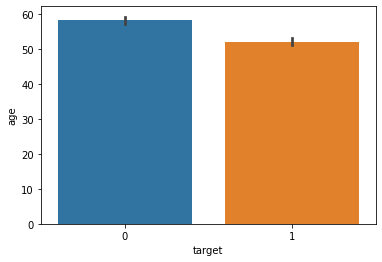

In [30]:
sns.barplot(x = 'target',y = 'age',data = data)

<AxesSubplot:xlabel='target', ylabel='exang'>

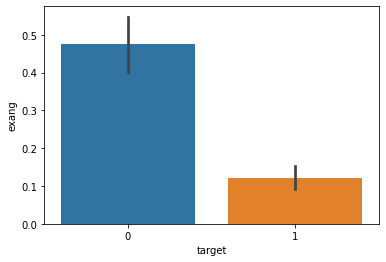

In [31]:
sns.barplot(x = 'target',y = 'exang',data = data)

<AxesSubplot:xlabel='target', ylabel='cp'>

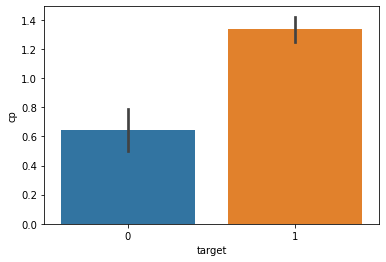

In [32]:
sns.barplot(x = 'target',y = 'cp',data = data)

<AxesSubplot:xlabel='target', ylabel='chol'>

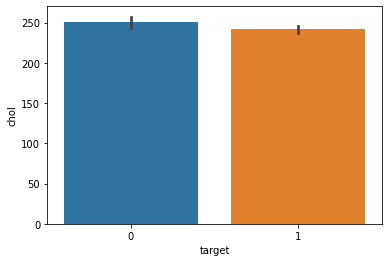

In [33]:
sns.barplot(x = 'target',y = 'chol',data = data)

<AxesSubplot:xlabel='target', ylabel='sex'>

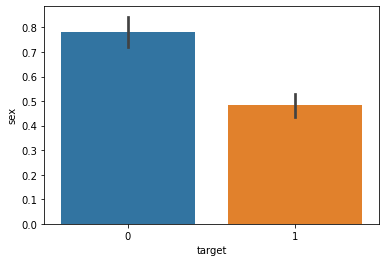

In [34]:
sns.barplot(x = 'target',y = 'sex',data = data)

<AxesSubplot:xlabel='target', ylabel='slope'>

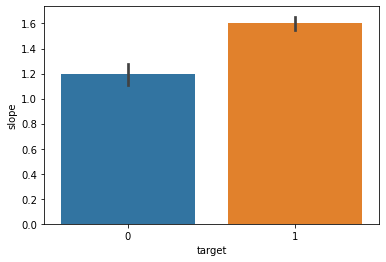

In [35]:
sns.barplot(x = 'target',y = 'slope',data = data)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

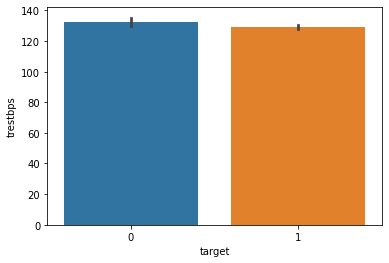

In [36]:
sns.barplot(x = 'target',y = 'trestbps',data = data)

### STEP 5) MODEL TRAINING

### SPLITTING DATA

In [24]:
df1=data[['thalach','ca','oldpeak','age','exang','cp','chol','sex','slope','trestbps','restecg']]
df2=data['target']
data_train, data_test, label_train, label_test = train_test_split(df1, df2, test_size = 0.3, random_state = 50)

### 5.1) KNN 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier(n_neighbors=2)
model.fit(data_train,label_train)
model_train = model.score(data_train, label_train)
print("Training score: ",model_train)
model_test = model.score(data_test, label_test)
print("Testing score: ",model_test)


Training score:  0.985781990521327
Testing score:  0.9175824175824175


### 5.2) SVM

In [26]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(data_train, label_train)
model_train1 = model1.score(data_train, label_train)
print("Training score: ",model_train1)
model_test1 = model1.score(data_test, label_test)
print("Testing score: ",model_test1)

Training score:  0.7156398104265402
Testing score:  0.6978021978021978


### 5.3) LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression 
logreg =  LogisticRegression(solver='liblinear') 
model2=logreg.fit(data_train,label_train) 
model_train2 = model2.score(data_train, label_train)
print("Training score: ",model_train2)
model_test2 = model2.score(data_test, label_test)
print("Testing score: ",model_test2)


Training score:  0.8744075829383886
Testing score:  0.8406593406593407


### 5.4) DECISION TREES

In [52]:
from sklearn import tree
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8696682464454977
Testing score:  0.8681318681318682


# Hence we can see that we get best training and testing score in KNN so we will select it